# Assignment 06
## Learning outcomes
This Assignment integrates knowledge and skills acquired in the last 5 Assignments – and extends it to Power analysis and Bayesian inference. The Assignment simultaneously serves as a practice for the midterm, which will be comparable in scope, length, and difficulty. 
## Preliminaries
Sets up the environment by importing pandas, numpy, matplotlib, and seaborn. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). Preliminaries are already taken care off in the workbook. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import scipy.stats as ss
import pandas as pd 
import numpy as np
import seaborn as sb

## Task 1: Power and Bayesian hypothesis testing (40pt)
### Question 1.1 (10pt)
For this tasks we will use the medical advisor example from Assignment 5, Task 3. You are thinking about hiring a medical advisor for a liver transplant that had 100 cases and only 5 complications. The normal base rate of complications in North America is 10%. You are trying to decide between two hypotheses: 

H0: The Consultant does not impact the complication rate (i.e. p=0.1)

H1: The Consultant halves the complication rate (i.e. p=0.05)

Write a function that generates data (using the Monte-carlo function from last assignment), either assuming tha H0 is true, or assuming that H1 is true. The function should plot an overlapped histogram of the two distributions (see lecture slides). The function should then calculate and print out the p-value and the power for a decision citerion, where you reject the Null-hypothesis for a specific number of complications (or lower). Then run the function to calculate the probability that you falsely reject the Null-hypothesis, if you use reject the Null-hypothesis when observing 5 or fewer complications. 

In [3]:
def monteCarloSim(prob_success, N, numIter=100):
    results = np.zeros(numIter)
    
    # Simulate each trial
    for i in range(numIter):
        results[i] = np.sum([x < prob_success for x in np.random.rand(1, N)])
    
    return results

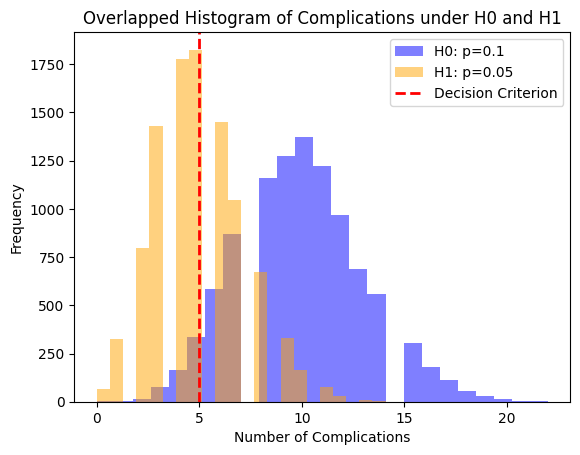

P-value: 0.0592
Power: 0.6222


(0.0592, 0.6222)

In [8]:
def generate_data_and_plot(H0_prob, H1_prob, N, numIter=1000, decision_criterion=5):
    # Generating data assuming H0 is true
    data_H0 = monteCarloSim(H0_prob, N, numIter)
    # Generating data assuming H1 is true
    data_H1 = monteCarloSim(H1_prob, N, numIter)
    
    # Plotting the overlapped histograms
    plt.hist(data_H0, alpha=0.5, label='H0: p=0.1', bins=25, color='blue')
    plt.hist(data_H1, alpha=0.5, label='H1: p=0.05', bins=25, color='orange')
    plt.axvline(decision_criterion, color='red', linestyle='dashed', linewidth=2, label='Decision Criterion')
    plt.xlabel('Number of Complications')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Overlapped Histogram of Complications under H0 and H1')
    plt.show()
    
    # Calculating p-value and power
    p_value = np.mean(data_H0 <= decision_criterion)  # Probability of observing decision criterion or fewer under H0
    power = np.mean(data_H1 <= decision_criterion)  # Probability of correctly rejecting H0
    
    print(f"P-value: {p_value:.4f}")
    print(f"Power: {power:.4f}")

    # Return p-value and power for further analysis if needed
    return p_value, power

# Parameters
H0_prob = 0.1  # Null hypothesis complication rate
H1_prob = 0.05  # Alternative hypothesis complication rate
N = 100  # Total number of cases
numIter = 10000  # Number of iterations for Monte Carlo simulation
decision_criterion = 5  # Criterion for rejecting H0

# Run the function
generate_data_and_plot(H0_prob, H1_prob, N, numIter, decision_criterion)

*Figure 1*. The distribution under the null hypothesis (light blue) alongside the distribution under the alternative hypothesis (orange). The vertical black line shows the number of complications the consultant has had in 100 liver transplants. 

### Question 1.2 (8 pt)
According to current statistical standards (i.e., a critical p-value of 5%), would the decision to reject the Null be appropriate? How does the 
power calculation influence your thinking about this decision? 

the p-value is slightly above the value of 0.05 to determine statistical significance, so it's not quit enough evidence to reject the null hypothesis. the power being 0.62 suggests that there is a 62% chance of correctly rejecting the null hypothesis if the alternative hypothesis is true.

### Question 1.3 ( 7 pt)
How the p-value and the power change if you decided to hire the advisor if there were 7 or less complications in 100 cases? Written answer: Would this be a better decision criterion than 5 case? 

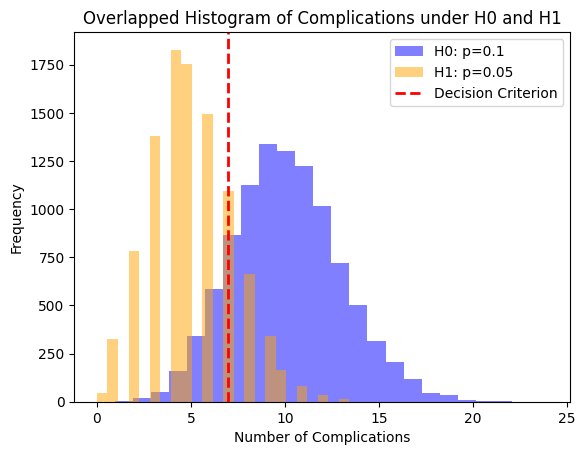

P-value: 0.2029
Power: 0.8704


(0.2029, 0.8704)

In [10]:
# Parameters
H0_prob = 0.1  # Null hypothesis complication rate
H1_prob = 0.05  # Alternative hypothesis complication rate
N = 100  # Total number of cases
numIter = 10000  # Number of iterations for Monte Carlo simulation
decision_criterion = 7  # Criterion for rejecting H0

# Run the function
generate_data_and_plot(H0_prob, H1_prob, N, numIter, decision_criterion)

the p-value and power are both significantly increased meaning that it is less conservative, so less evidence is required to say that the advisor was effective. it also means that there is more likely to be a false positive in declaring the advisor's effectiveness.

Written answer:

### Question 1.4 (10pt)
Write a function that again simulates data both under the H0 and H1, using similar code as in Question 1. Then calculate the Bayes-Factor BF(H1/H0). Finally report the posterior probability of the H1, assuming the prior probability was 0.5. 

In [18]:
def calculate_bayes_factor(h0, h1, N, observed_complications, numIter=10000):
    h0_data = monteCarloSim(h0, N, numIter)
    h1_data = monteCarloSim(h1, N, numIter)

    likelihood_h0 = np.mean(h0_data == observed_complications)
    likelihood_h1 = np.mean(h1_data == observed_complications)

    bf_10 = likelihood_h1 / likelihood_h0
    prior_h1 = 0.5

    posterior_h1 = (bf_10 * prior_h1) / ((bf_10 * prior_h1) + (1 - prior_h1))

    return bf_10, posterior_h1

In [14]:
bf_10, posterior_h1 = calculate_bayes_factor(0.1, 0.05, 100, 5)
bf_10, posterior_h1

(4.806010928961749, 0.7061421116017663)

### Question 1.5: (5pt)
How would you interpret the BF and the posterior probability?

bf(h1/h0) > 1 indicates that evidence favours h1, and we have ~4.8 which means that evidence heavily favours h1. the posterior probability tells us that after considering the evidence and prior belief, there is a 70% chance that h1 is true.

## Task 2: The relation between smoking and premature birth: Frequentist testing (25pt)
The data for this task come from a random sample of 150 births from the birth records in the US state of North Carolina in 2004. The data contains 50 records from mothers that self-identified as having smoked on average more than 2 cigarettes per week during the pregnancy (smokers) and 100 mothers that smoked not at all or less than 2 cigarettes per week during the pregnancy. 

The data frame has 150 observations with the following 9 variables:

- fAge: Father’s age.
- mAge: Mother’s age.
- weeks:  Weeks at which the mother gave birth.
- premature: Indicates whether the baby was premature or not.
- visits: Number of hospital visits.
- gained: Weight gained by mother (lbs) 
- weight: Birth weight of the baby (lbs) 
- sexBaby: Gender of the baby 
- smoke:  Whether or not the mother self-reported to be a smoker.

### Question 2.1 (8 pt) 
Calculate and report the mean birth weight of babies born by smoking and by non-smoking moms. Generate a violinplot of birth weight, with separate violins for smokers and non-smokers. Make sure that the two violins are plotted in the same graph, so the two groups can be directly compared. Written answer: What do you observe in terms of means and median for the two groups? Is the distribution symmetric, left-skewed, or right-skewed? 

In [20]:
data = pd.read_csv('births.csv')


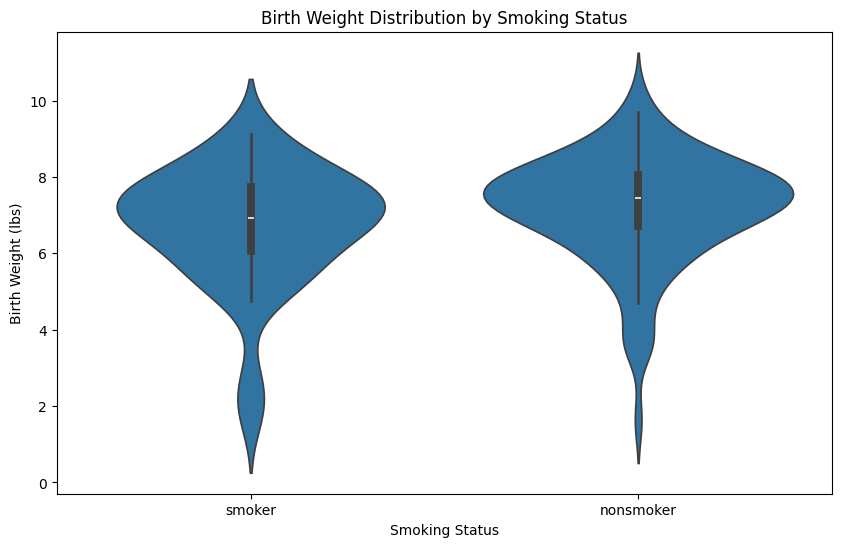

Mean birth weight for non-smokers: 7.19 lbs
Mean birth weight for smokers: 6.72 lbs
Median birth weight for non-smokers: 7.44 lbs
Median birth weight for smokers: 6.92 lbs


In [23]:
# Calculate mean birth weight by smoking status
mean_birth_weight = data.groupby('smoke')['weight'].mean()
median_birth_weight = data.groupby('smoke')['weight'].median()

# Generate a violinplot of birth weight for smokers vs non-smokers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='smoke', y='weight', data=data)
plt.title('Birth Weight Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Birth Weight (lbs)')
plt.show()

print(f"Mean birth weight for non-smokers: {mean_birth_weight[0]:.2f} lbs")
print(f"Mean birth weight for smokers: {mean_birth_weight[1]:.2f} lbs")

print(f"Median birth weight for non-smokers: {median_birth_weight[0]:.2f} lbs")
print(f"Median birth weight for smokers: {median_birth_weight[1]:.2f} lbs")


the mean and median of babies born to non-smokers are higher. the distribution of both groups is slightly right-skewed, with a longer tail towards higher birth weights.

### Question 2.2 (10pt)
As a researcher, you want to test the idea that smoking during pregnancy has *some influence* on the baby's birthweight. Formulate Null- and Alternative hypothesis (using =, >, <, and unequal signs). Write a function that returns the difference of the average birth weights between babies of smoker and non-smokers. Use a randomization test to test whether (and with what Type-I error) you can reject the Null-hypothesis. Do you need to use a one-sided or two-sided test? Written answer: What is your conclusion? 

h0: smoking during pregnancy has no influence on baby's weight
h1: smoking during pregnancy has some influence on baby's weight

In [50]:
def mean_diff(data):
    """Calculate the difference in mean birth weight between smokers and non-smokers."""
    diff = data[data['smoke'] == 'smoker']['weight'].mean() - data[data['smoke'] == 'nonsmoker']['weight'].mean()
    return diff

obs_diff = mean_diff(data)
obs_diff

-0.4715999999999987

In [46]:
def randomization_test(data, p_val, nIters=10000, retDiff=False):
    # Calculate the observed test statistic
    obs_diff = mean_diff(data)

    # Shuffle the data and calculate the test statistic
    diffs = []
    for _ in range(nIters):
        shuffled = data['weight'].sample(frac=1, replace=False).reset_index(drop=True)
        shuffled_data = data.assign(weight=shuffled)
        diffs.append(mean_diff(shuffled_data))

    if retDiff:
        return diffs

    # Calculate the p-value
    p_value = (p_val(diffs, obs_diff)).mean()

    return p_value

p_value = randomization_test(data, lambda s, ns : (np.abs(s) >= np.abs(ns))) # 2 way test with abs
p_value

0.0647

the mean difference tells us that between babies of smokers and non-smokers, there is ~0.47 lbs of difference, with smoker babies weighing less. we use a 2 sided test because we're interested in whether there is a difference at all, not which direction the difference is in. 

the computed p-value of 0.0647 is higher than our standard 0.05 so we don't have enough evidence to conclude that smoking makes a difference in weight.

### Question 2.3 (7 pt)
You want to test the directed hypothesis that smoking is associated with a **lower** birth weight. Again, formulate Null and Alternative hypothesis. Use again a randomization test to see if you have evidence to reject the Null. Written answer: what is your conclusion? 

Null Hypothesis: Birthweight (smoker) >= Birthweight (non-smoker)

Alt. Hypothesis: Birthweight (smoker) < Birthweight (non-smoker)

In [40]:
p_value = randomization_test(data, lambda s, ns : (s <= ns)) # 1 way test
p_value

0.037

our p-value is now 0.037, which is under 0.05, so it would seem there is enough evidence to say that smoking decreases birth weight.

## Task 3: Smoke-related reduction in birth weight: Bayesian hypothesis testing (35pt)
### Question 3.1 (10pt)
Determine and report the mean and standard deviation of the mean differences in birth weight under the Null hypothesis (birth weights for smokers and non-smokers are equal) directly from the array of test statistics as obtained from the randomization test performed for Question 2.2. 

(Hint: you may have to rewrite the performRandomization function to return the list of test statistics)

In [47]:
diffs_arr = randomization_test(data, lambda s, ns : (np.abs(s) >= np.abs(ns)), retDiff=True)
rand_mean = np.mean(diffs_arr)
rand_std = np.std(diffs_arr)

rand_mean, rand_std


(-0.0014223599999998353, 0.25705170215353645)

### Question 3.2 (10pt)
An average drop of birthweight of **0.5lbs** is considered to be clinically significant risk. Use a Bayesian hypothesis test to determine how strong the evidence is that smoking is associated with a clinically significant reduction in birth weight. Based on the shape of the distribution of the mean difference from the randomization test in Question 2.2, you decide that it is appropriate to use a normal approximation for the average weight difference, both under the H1 and H0. Further, you assume a standard error of the mean difference of 0.25lbs both for the H1 and the H0. Calculate the probability density for the real mean difference under H1 and H0. Then calculate and report the Bayes Factor of the H1 over the H0. What can you conclude from this result?  

In [56]:
mu_h0, mu_h1 = 0, -0.5
std_err = 0.25

pdf_h0 = ss.norm.pdf(obs_diff, mu_h0, std_err)
pdf_h1 = ss.norm.pdf(obs_diff, mu_h1, std_err)

bf = pdf_h1 / pdf_h0

pdf_h0, pdf_h1, bf

(0.2693087866159333, 1.5855056014528939, 5.887314786034127)

this result suggests strongly in the favour of the alternate hypothesis (where smoking is associated with clinically significant reduction in brith weight). our baye's factor is 5.89, which means it is almost 6x more likely than the null hypothesis of no difference, indicating strong evidence in favour of the alternative hypothesis. we can make a conclusion that smoking can be associated with clinically significant reduction in birth weight.

### Question 3.3 (7pt)
What is the posterior probability of the H1, assuming that a-priori you had the belief that there was a 70% chance that smoking may reduce the birth weight by 0.5lb.  Use the results from task 3 question 2. Show clearly the formula used to calculate the posterior probability. Written answer: What is the meaning of this posterior probability? How does the meaning differ from the p-value calculated under Task 2, Question 3? 

In [59]:
p_h1_prior = 0.7
p_data = (pdf_h1 * p_h1_prior) + (pdf_h0 * (1 - p_h1_prior))
p_h1_posterior = (pdf_h1 * p_h1_prior) / p_data
p_h1_posterior

0.9321438965160025

this prosterior probability tells us there is 93% chance that smoking decreases birth weight by at lesat 0.5 lbs. the increase from 70% to 93% demonstrates that the evidence is strongly supportive of the alternative hypotehsis over the null hypothesis. p-value tells us the probability of observing data as extreme as what we have, or more. the posterior probability tells us how confident we are regarding the hypothesis.

### Question 3.4 (8pt)
A news outlet picks up your result, saying that "the study shows that smoking among US women causes an average decrease in birth weight of more than 0.4lbs." Can you draw this conclusion from the data? What are two possible problems with such claim?

the dataset is only from 150 women from North Carolina in 2004, so it may not be large enough or too local to accurately represent all US women. the correlation also doesn't necessarily mean causation. 